In [1]:
from google.colab import files

uploaded = files.upload()

Saving scores_data - scores_data.csv to scores_data - scores_data.csv


In [143]:
import numpy as np
import pandas as pd

df=pd.read_csv("scores_data - scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [144]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


# Feature Engineering(Feature Selection)
Among all the attributes "User_ID" feature does not provide any contribution in deciding the best performance among all batches. So it can be removed from the data frame.

In [146]:
df=df.drop(columns=['User_ID'])

# Data Cleaning

In [147]:
# Convert columns to int dtype
df['Batch']=df['Batch'].str.replace('AI_ELITE_','')
df['Score']=df['Score'].str.replace(' / 7','')

df.head()


,Batch,Score
0,7,6
1,7,6
2,7,7
3,7,7
4,7,4


In [148]:
df['Batch']=df['Batch'].astype('int')
df['Score']=df['Score'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Batch   149 non-null    int64
 1   Score   149 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


# Univariate analysis on Score feature

In [149]:
df['Score'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

# Detection of Outliers

<Axes: >

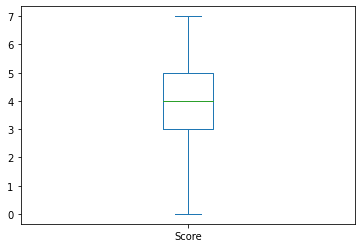

In [150]:
df['Score'].plot(kind='box')

From the above plot, it is noted that outliers does not exist in the data

In [152]:
# Check the number of students in a batch
df['Batch'].value_counts()

7    53
6    48
4    48
Name: Batch, dtype: int64

<Axes: title={'center': 'Score'}, xlabel='Batch'>

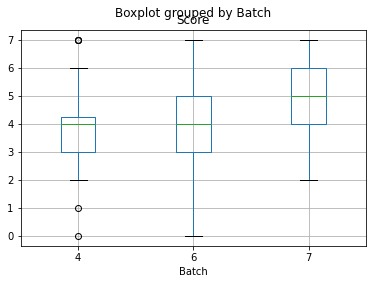

In [153]:
df.boxplot(by='Batch',column='Score')

<Axes: title={'center': 'Pie chart of mean scores'}, ylabel='Score'>

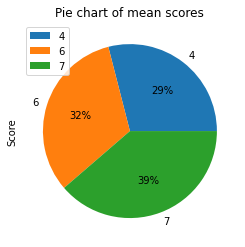

In [154]:
df.groupby(['Batch']).mean().plot(kind='pie', y='Score',autopct='%1.0f%%', title='Pie chart of mean scores')

# Insights
From the above plots, it can be interpreted that batch 7 performed well in the test as the average is higher and spread of scores is also higher compared to other batches (Many students scored higher marks). Pie chart represents the distribution of average of scores of different batches.